# Lista 2: Execício 2

SEL0367 - Controle Adaptativo

> Aluno: Felipe Andrade Garcia Tommaselli- 11800910 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import control.matlab as matlab

Planta do sistema: 
$y = \frac{s + 3}{s^2 + a_1 \cdot s + a_0} \cdot u$


In [26]:
# Parametros
a1 = 3
a0 = 1
b0 = 1

In [27]:
# Definição das funções de transferência do sistema
s = matlab.tf('s')

ftx = b0 / (s**2 + a1 * s + a0)

ftx1 = s**2/(s**2 + 2*s+1)*ftx
ftx2 = b0/(s**2+2*s+1)
ftx3 = -s/(s**2+2*s+1)*ftx
ftx4 = -1/(s**2+2*s+1)*ftx

ftx

TransferFunction(array([1]), array([1, 3, 1]))

In [28]:
# Parâmetros de simulação
N = 350
dt = 0.1  # Taxa de amostragem
T = np.arange(0, N + dt, dt)
u = 0.1*np.cos(np.pi*T/7) + 0.05*np.sin(np.pi*T/5) # entrada

len(T)

3501

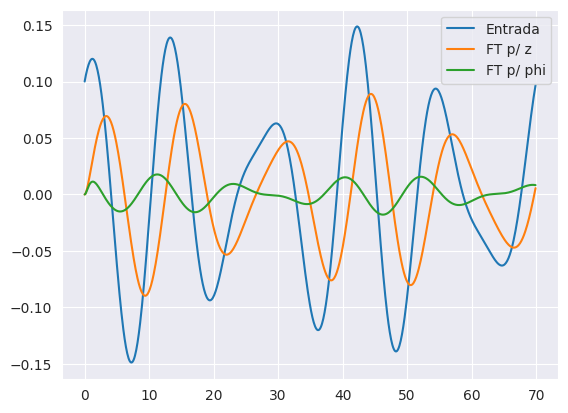

In [29]:
# Simulação dos modelos
Y, T, _  = matlab.lsim(ftx, u, T)
Y1, T, _ = matlab.lsim(ftx1, u, T)
Y2, T, _ = matlab.lsim(ftx2, u, T)
Y3, T, _ = matlab.lsim(ftx3, u, T)
Y4, T, _ = matlab.lsim(ftx4, u, T)


# Plotagem dos resultados juntos
corte = 0.2*(len(T) - 1) # facilitar visualização
corte = int(np.ceil(corte))
plt.plot(T[:corte], u[:corte], label='Entrada')
plt.plot(T[:corte], Y[:corte], label='FT p/ z')
plt.plot(T[:corte], Y1[:corte], label='FT p/ phi')

plt.legend()
plt.show()

In [30]:
# %%%%%%%%%%%%%%%%%%%%%%%%%%%
theta = np.zeros((2, int(N/dt) + 1))  # Matriz para armazenar os parâmetros estimados
theta[:, 0] = [0, 0]
erro = np.zeros(int(N/dt) + 1)  # Vetor de erros
z = np.zeros(int(N/dt) + 1) 

gama = np.array([[25, 0], [0, 25]])  # Matriz de ajuste

In [31]:
# Loop de iterações para o algoritmo adaptativo
for k in range(0, int(N/dt)):
    z[k] = (Y1[k] - Y2[k])
    
    # Construção do vetor phi
    phi = np.array([[Y3[k]], [Y4[k]]])
    
    # Cálculo de ms (fator de ajuste)
    ms = 1 + 0.1 * np.dot(phi.T, phi)[0, 0]

    # Atualização dos parâmetros estimados usando o algoritmo adaptativo
    erro[k] = (z[k] - np.dot(theta[:, k].T, phi))[0] / ms**2
    delta_theta = (dt * np.dot(gama, erro[k] * phi) / ms**2).reshape((2,))
    theta[:, k+1] = theta[:, k] + delta_theta

len theta: 2


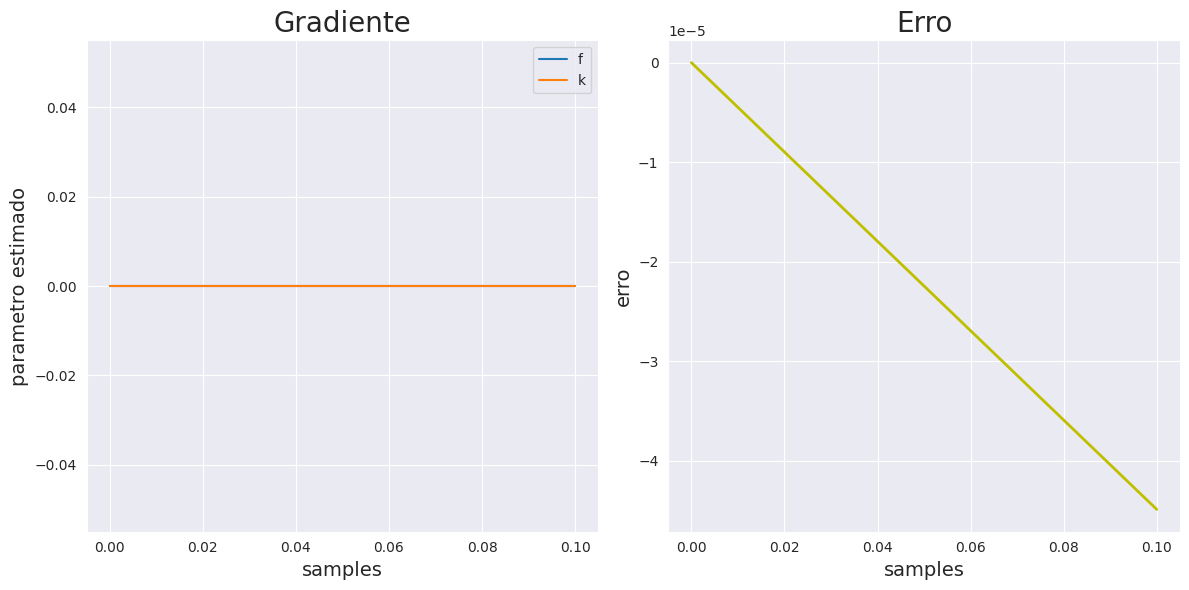

In [32]:
# Gráfico dos parâmetros identificados e do erro

# Crie uma figura com 1 linha e 2 colunas para os subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

print(f'len theta: {len(theta)}')
corte = int(np.ceil(1*len(theta)))

fontesize = 14
titlesize = 20
# Primeiro subplot (Gráfico dos parâmetros estimados)
axs[0].plot(T[:corte], theta[0, :][:corte], label='f')
axs[0].plot(T[:corte], theta[1, :][:corte], label='k')
axs[0].legend()
axs[0].set_xlabel('samples', fontsize=fontesize)
axs[0].set_ylabel('parametro estimado', fontsize=fontesize)
axs[0].set_title('Gradiente', fontsize=titlesize)

# Segundo subplot (Gráfico do erro)
axs[1].plot(T[:corte], erro[:corte], 'y', linewidth=2)
axs[1].set_xlabel('samples', fontsize=fontesize)
axs[1].set_ylabel('erro', fontsize=fontesize)
axs[1].set_title('Erro', fontsize=titlesize)
axs[1].grid(True)

# Ajuste o espaço entre os subplots
plt.tight_layout()

# Exiba os subplots lado a lado
plt.show()